<a href="https://colab.research.google.com/github/YusolCho/Game_Analysis/blob/main/0505_GOLD%E1%84%83%E1%85%A6%E1%84%8B%E1%85%B5%E1%84%90%E1%85%A5%E1%84%8C%E1%85%A5%E1%86%AB%E1%84%8E%E1%85%A5%E1%84%85%E1%85%B5(%EC%B1%94%ED%94%BC%EC%96%B8%EB%AA%A9%EB%A1%9D%EC%88%98%EC%A0%95%ED%95%A8)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 데이터 불러오고 훑어보기 
data = pd.read_csv('./GOLD.csv')
data = data.drop('index',axis=1) # index열 제거
data.head()

,assists,kills,deaths,champExp,champName,indiPos,lane,role,gold,teamPos,tDDealt,tDDealtChamp,tDTaken,tMKilled,turKills,win,division
0,10,11,2,13110,Sett,MIDDLE,MIDDLE,SOLO,13096,MIDDLE,129264,28486,30670,152,2,True,1
1,2,9,0,8716,Sett,MIDDLE,NONE,SUPPORT,10750,MIDDLE,99882,10026,11422,132,3,True,1
2,0,2,3,7995,Garen,MIDDLE,NONE,SUPPORT,5659,MIDDLE,58604,5056,9121,114,0,False,1
3,5,8,2,12688,Garen,MIDDLE,MIDDLE,SOLO,11262,MIDDLE,99840,18053,20400,147,3,True,1
4,2,6,3,21625,Sett,MIDDLE,MIDDLE,DUO,15372,MIDDLE,240132,15784,40154,278,3,True,1


In [ ]:
# 53개의 챔피언에 해당되는 데이터만 남기기 
champ_namelist =['Galio', 'Gragas', 'Neeko', 'Diana', 'Ryze', 'Lux',
             'Rumble', 'Renekton', 'Leblanc', 'Lissandra', 'Malzahar', 'Malphite', 
             'Veigar', 'Vex', 'Vladimir', 'Viktor', 'Sylas', 'Sett', 
             'Swain', 'Syndra', 'Singed', 'Ahri', 'AurelionSol', 'Azir', 
             'Akali', 'Akshan', 'Annie', 'Anivia', 'Yasuo', 'Ekko',
             'Orianna', 'Yone', 'Irelia', 'Zac', 'Zed', 'Xerath',
             'Jayce', 'Zoe', 'Ziggs', 'Chogath', 'Kassadin', 'Cassiopeia',
             'Katarina', 'Kennen', 'Corki', 'KSante', 'Qiyana', 'Talon',
             'Taliyah', 'Tristana', 'TwistedFate', 'Pantheon', 'Fizz']
print('챔피언 개수 :',len(champ_namelist))
data = data[data['champName'].isin(champ_namelist)] 
data.head(10)

챔피언 개수 : 53


,assists,kills,deaths,champExp,champName,indiPos,lane,role,gold,teamPos,tDDealt,tDDealtChamp,tDTaken,tMKilled,turKills,win,division
0,10,11,2,13110,Sett,MIDDLE,MIDDLE,SOLO,13096,MIDDLE,129264,28486,30670,152,2,True,1
1,2,9,0,8716,Sett,MIDDLE,NONE,SUPPORT,10750,MIDDLE,99882,10026,11422,132,3,True,1
4,2,6,3,21625,Sett,MIDDLE,MIDDLE,DUO,15372,MIDDLE,240132,15784,40154,278,3,True,1
5,6,15,1,16037,Pantheon,MIDDLE,MIDDLE,SOLO,15778,MIDDLE,157450,31555,21473,188,1,True,1
6,3,10,6,15900,KSante,MIDDLE,MIDDLE,SOLO,13053,MIDDLE,130734,35229,42056,175,1,False,1
7,4,4,4,13136,KSante,MIDDLE,MIDDLE,SOLO,10309,MIDDLE,148260,22389,22919,208,2,False,1
8,17,5,9,18186,KSante,MIDDLE,TOP,DUO,14362,MIDDLE,158931,27805,40264,209,1,True,1
9,4,12,3,12137,KSante,MIDDLE,MIDDLE,SOLO,11836,MIDDLE,110820,19083,21834,158,1,True,1
10,0,3,7,12273,KSante,MIDDLE,TOP,SOLO,8972,MIDDLE,102439,10828,31185,200,1,False,1
11,3,10,0,7389,KSante,MIDDLE,NONE,SUPPORT,8905,MIDDLE,69735,9644,7996,115,1,True,1


<참고>
* 기존 챔피언 이름 리스트에서 철자/띄어쓰기가 잘못된 것이 있어 다음과 같이 수정하였음
1. LeBlanc -> Leblac
2. Aurelion Sol -> AurelionSol
+3. 자크넣고 갠플랭크 지움 

In [ ]:
data

,assists,kills,deaths,champExp,champName,indiPos,lane,role,gold,teamPos,tDDealt,tDDealtChamp,tDTaken,tMKilled,turKills,win,division
0,10,11,2,13110,Sett,MIDDLE,MIDDLE,SOLO,13096,MIDDLE,129264,28486,30670,152,2,True,1
1,2,9,0,8716,Sett,MIDDLE,NONE,SUPPORT,10750,MIDDLE,99882,10026,11422,132,3,True,1
4,2,6,3,21625,Sett,MIDDLE,MIDDLE,DUO,15372,MIDDLE,240132,15784,40154,278,3,True,1
5,6,15,1,16037,Pantheon,MIDDLE,MIDDLE,SOLO,15778,MIDDLE,157450,31555,21473,188,1,True,1
6,3,10,6,15900,KSante,MIDDLE,MIDDLE,SOLO,13053,MIDDLE,130734,35229,42056,175,1,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14324,8,5,8,15305,Qiyana,MIDDLE,MIDDLE,SOLO,12279,MIDDLE,136474,26920,29241,162,0,False,4
14325,12,6,7,17003,AurelionSol,MIDDLE,MIDDLE,DUO,12982,MIDDLE,132998,21462,36261,147,2,True,4
14326,9,5,6,13006,AurelionSol,MIDDLE,MIDDLE,SOLO,9529,MIDDLE,75086,12173,23359,105,1,True,4
14327,4,1,11,11812,Yasuo,MIDDLE,MIDDLE,SOLO,8549,MIDDLE,103809,12073,25537,157,1,False,4


In [ ]:
# 인덱스 좀 정리하기 
data.reset_index(inplace = True)
data = data.drop('index', axis=1)
data

,assists,kills,deaths,champExp,champName,indiPos,lane,role,gold,teamPos,tDDealt,tDDealtChamp,tDTaken,tMKilled,turKills,win,division
0,10,11,2,13110,Sett,MIDDLE,MIDDLE,SOLO,13096,MIDDLE,129264,28486,30670,152,2,True,1
1,2,9,0,8716,Sett,MIDDLE,NONE,SUPPORT,10750,MIDDLE,99882,10026,11422,132,3,True,1
2,2,6,3,21625,Sett,MIDDLE,MIDDLE,DUO,15372,MIDDLE,240132,15784,40154,278,3,True,1
3,6,15,1,16037,Pantheon,MIDDLE,MIDDLE,SOLO,15778,MIDDLE,157450,31555,21473,188,1,True,1
4,3,10,6,15900,KSante,MIDDLE,MIDDLE,SOLO,13053,MIDDLE,130734,35229,42056,175,1,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13102,8,5,8,15305,Qiyana,MIDDLE,MIDDLE,SOLO,12279,MIDDLE,136474,26920,29241,162,0,False,4
13103,12,6,7,17003,AurelionSol,MIDDLE,MIDDLE,DUO,12982,MIDDLE,132998,21462,36261,147,2,True,4
13104,9,5,6,13006,AurelionSol,MIDDLE,MIDDLE,SOLO,9529,MIDDLE,75086,12173,23359,105,1,True,4
13105,4,1,11,11812,Yasuo,MIDDLE,MIDDLE,SOLO,8549,MIDDLE,103809,12073,25537,157,1,False,4


In [ ]:
data.isna().sum()  # 결측치는 없다. 

assists         0
kills           0
deaths          0
champExp        0
champName       0
indiPos         0
lane            0
role            0
gold            0
teamPos         0
tDDealt         0
tDDealtChamp    0
tDTaken         0
tMKilled        0
turKills        0
win             0
division        0
dtype: int64

In [ ]:
# win 변수의 값을 1, 0으로 변경 
data['win'].replace([True, False],[1, 0], inplace=True)

In [ ]:
# division 변수를 원 핫 인코딩 
division_dummy = pd.get_dummies(data['division'])

In [ ]:
division_dummy.head(5)

,1,2,3,4
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [ ]:
data = pd.concat([data,division_dummy], axis = 1) # (재실행X코드)만들어진 원핫 인코딩 결과와 기존 데이터프레임 가로로 병합 

In [ ]:
# 데이터프레임 변수명 정리
data.columns = [     'assists',        'kills',       'deaths',     'champExp',
          'champName',      'indiPos',         'lane',         'role',
               'gold',      'teamPos',      'tDDealt', 'tDDealtChamp',
            'tDTaken',     'tMKilled',     'turKills',          'win',
           'division',              'division_1',              'division_2',              'division_3',
                    'division_4']

In [ ]:
# one hot encoding 수해했으니 기존의 division 변수 삭제 
# data.drop('division', axis=1, inplace = True)

In [ ]:
data

,assists,kills,deaths,champExp,champName,indiPos,lane,role,gold,teamPos,...,tDDealtChamp,tDTaken,tMKilled,turKills,win,division,division_1,division_2,division_3,division_4
0,10,11,2,13110,Sett,MIDDLE,MIDDLE,SOLO,13096,MIDDLE,...,28486,30670,152,2,1,1,1,0,0,0
1,2,9,0,8716,Sett,MIDDLE,NONE,SUPPORT,10750,MIDDLE,...,10026,11422,132,3,1,1,1,0,0,0
2,2,6,3,21625,Sett,MIDDLE,MIDDLE,DUO,15372,MIDDLE,...,15784,40154,278,3,1,1,1,0,0,0
3,6,15,1,16037,Pantheon,MIDDLE,MIDDLE,SOLO,15778,MIDDLE,...,31555,21473,188,1,1,1,1,0,0,0
4,3,10,6,15900,KSante,MIDDLE,MIDDLE,SOLO,13053,MIDDLE,...,35229,42056,175,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13102,8,5,8,15305,Qiyana,MIDDLE,MIDDLE,SOLO,12279,MIDDLE,...,26920,29241,162,0,0,4,0,0,0,1
13103,12,6,7,17003,AurelionSol,MIDDLE,MIDDLE,DUO,12982,MIDDLE,...,21462,36261,147,2,1,4,0,0,0,1
13104,9,5,6,13006,AurelionSol,MIDDLE,MIDDLE,SOLO,9529,MIDDLE,...,12173,23359,105,1,1,4,0,0,0,1
13105,4,1,11,11812,Yasuo,MIDDLE,MIDDLE,SOLO,8549,MIDDLE,...,12073,25537,157,1,0,4,0,0,0,1


In [ ]:
# 단일 변수 분포 확인 

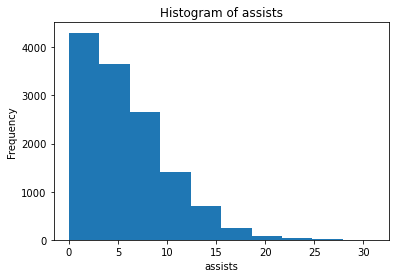

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb91fa5b8e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb91fa5bd60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb91fa5b610>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb91fa52310>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb91fa525e0>],
 'means': []}

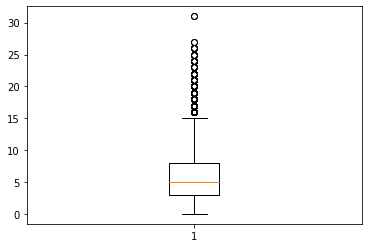

In [ ]:
# assists
plt.hist(data['assists'])
plt.title('Histogram of assists')
plt.xlabel('assists')
plt.ylabel('Frequency')
plt.show()
plt.boxplot(data['assists'])

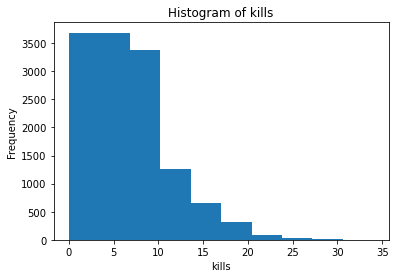

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb9202d0130>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb9202d05b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb9202c2e20>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb9202d0b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb9202d0e20>],
 'means': []}

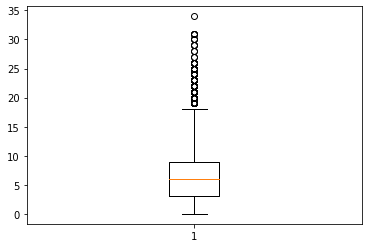

In [ ]:
# kills
plt.hist(data['kills'])
plt.title('Histogram of kills')
plt.xlabel('kills')
plt.ylabel('Frequency')
plt.show()
plt.boxplot(data['kills'])

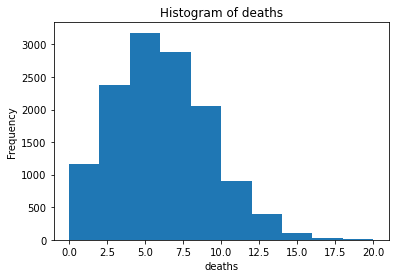

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb920db9ee0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb920dc93a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb920db9c10>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb920dc9940>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb920dc9c10>],
 'means': []}

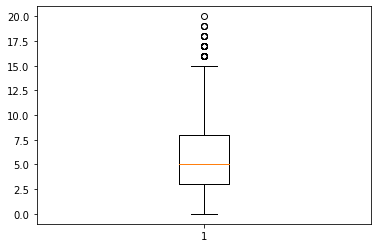

In [ ]:
# deaths
plt.hist(data['deaths'])
plt.title('Histogram of deaths')
plt.xlabel('deaths')
plt.ylabel('Frequency')
plt.show()
plt.boxplot(data['deaths'])

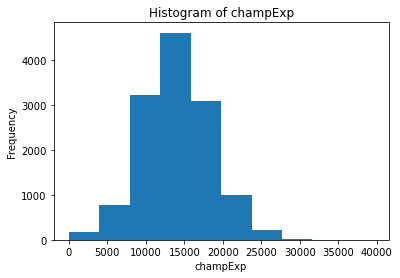

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb920fae760>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb920faebe0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb920fae490>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb920fbc1c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb920fbc490>],
 'means': []}

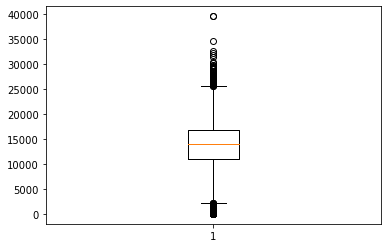

In [ ]:
# champExp
plt.hist(data['champExp'])
plt.title('Histogram of champExp')
plt.xlabel('champExp')
plt.ylabel('Frequency')
plt.show()
plt.boxplot(data['champExp'])

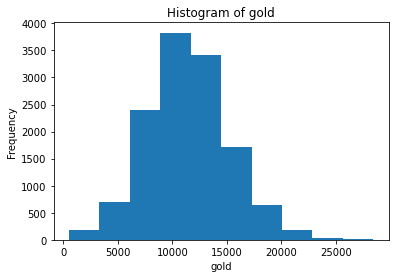

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb9211ef550>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb9211ef9d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb9211ef280>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb9211eff70>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb9211fd280>],
 'means': []}

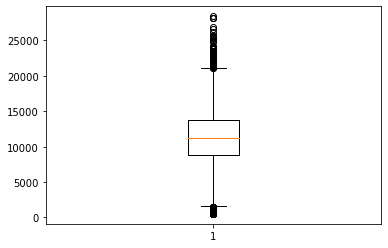

In [ ]:
# gold
plt.hist(data['gold'])
plt.title('Histogram of gold')
plt.xlabel('gold')
plt.ylabel('Frequency')
plt.show()
plt.boxplot(data['gold'])

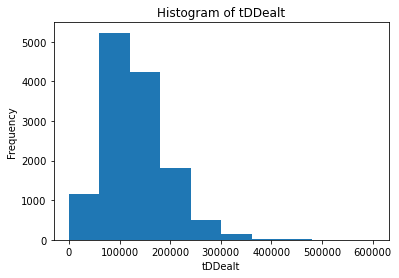

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb9213f45b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb9213f4b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb9213f4430>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb921402130>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb921402400>],
 'means': []}

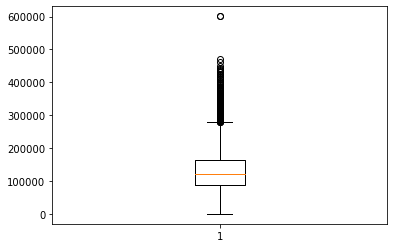

In [ ]:
# tDDealt
plt.hist(data['tDDealt'])
plt.title('Histogram of tDDealt')
plt.xlabel('tDDealt')
plt.ylabel('Frequency')
plt.show()
plt.boxplot(data['tDDealt'])

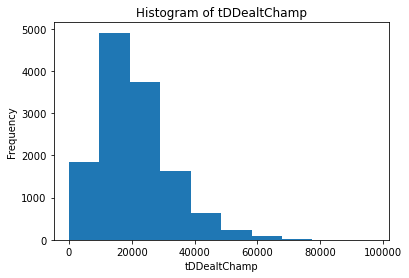

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb91de6e730>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb91e553a00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb91de6e670>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb921565370>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb921565760>],
 'means': []}

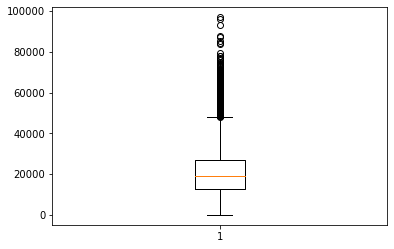

In [ ]:
# tDDealtChamp
plt.hist(data['tDDealtChamp'])
plt.title('Histogram of tDDealtChamp')
plt.xlabel('tDDealtChamp')
plt.ylabel('Frequency')
plt.show()
plt.boxplot(data['tDDealtChamp'])

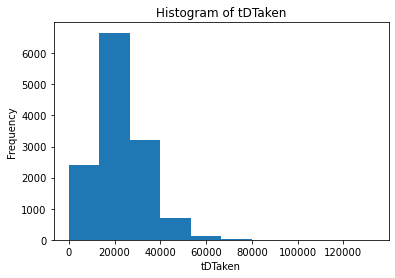

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb9210caf70>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb920fd2700>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb9210ca7f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb920fd8820>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb920fd8d30>],
 'means': []}

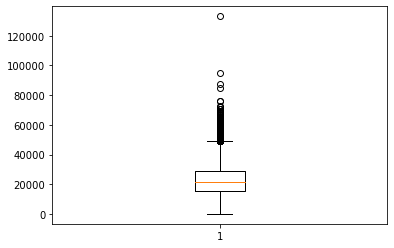

In [ ]:
# tDTaken
plt.hist(data['tDTaken'])
plt.title('Histogram of tDTaken')
plt.xlabel('tDTaken')
plt.ylabel('Frequency')
plt.show()
plt.boxplot(data['tDTaken'])

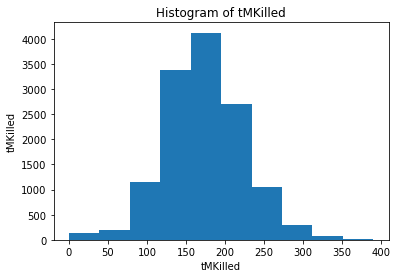

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb91faf89a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb91faf8be0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb91faf8df0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb91faf81f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb91facd6a0>],
 'means': []}

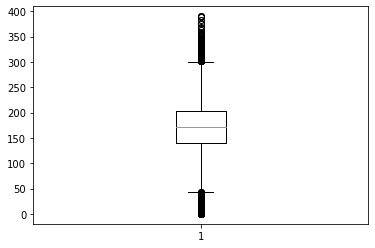

In [ ]:
# tMKilled
plt.hist(data['tMKilled'])
plt.title('Histogram of tMKilled')
plt.xlabel('tMKilled')
plt.ylabel('tMKilled')
plt.show()
plt.boxplot(data['tMKilled'])

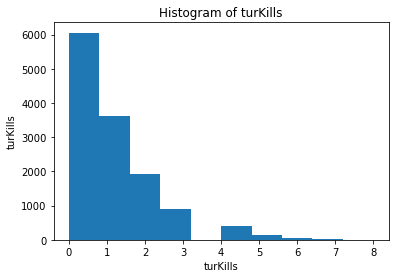

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb91d3e2c40>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb91d3db730>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb91d3e26a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb91d3dbaf0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb91d3dba60>],
 'means': []}

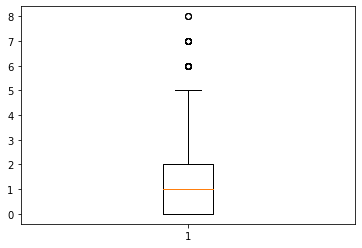

In [ ]:
# turKills
plt.hist(data['turKills'])
plt.title('Histogram of turKills')
plt.xlabel('turKills')
plt.ylabel('turKills')
plt.show()
plt.boxplot(data['turKills'])

In [ ]:
data.groupby('indiPos').count()  # MIDDLE 이 아닌 데이터 25

,assists,kills,deaths,champExp,champName,lane,role,gold,teamPos,tDDealt,tDDealtChamp,tDTaken,tMKilled,turKills,win,division,division_1,division_2,division_3,division_4
indiPos,,,,,,,,,,,,,,,,,,,,
Invalid,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
JUNGLE,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19
MIDDLE,13083,13083,13083,13083,13083,13083,13083,13083,13083,13083,13083,13083,13083,13083,13083,13083,13083,13083,13083,13083
TOP,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4


In [ ]:
data.groupby('lane').count()  # MIDDLE 이 아닌 데이터 꽤 많음

,assists,kills,deaths,champExp,champName,indiPos,role,gold,teamPos,tDDealt,tDDealtChamp,tDTaken,tMKilled,turKills,win,division,division_1,division_2,division_3,division_4
lane,,,,,,,,,,,,,,,,,,,,
BOTTOM,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48
JUNGLE,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60
MIDDLE,10883,10883,10883,10883,10883,10883,10883,10883,10883,10883,10883,10883,10883,10883,10883,10883,10883,10883,10883,10883
NONE,1386,1386,1386,1386,1386,1386,1386,1386,1386,1386,1386,1386,1386,1386,1386,1386,1386,1386,1386,1386
TOP,730,730,730,730,730,730,730,730,730,730,730,730,730,730,730,730,730,730,730,730


**고민해봐야 하는 것 :**
* teamPos 가 MIDDLE 인 것만 남기고 나머지는 다 삭제?

In [ ]:
data.groupby('teamPos').count()

,assists,kills,deaths,champExp,champName,indiPos,lane,role,gold,tDDealt,tDDealtChamp,tDTaken,tMKilled,turKills,win,division,division_1,division_2,division_3,division_4
teamPos,,,,,,,,,,,,,,,,,,,,
MIDDLE,13107,13107,13107,13107,13107,13107,13107,13107,13107,13107,13107,13107,13107,13107,13107,13107,13107,13107,13107,13107


In [ ]:
# teamPos 변수값은 모두 'MIDDLE' 이므로, teamPos 변수 삭제 
data = data.drop('teamPos', axis=1)

# 이상치 제거

### 범주형 변수 먼저 
### 1. indiPos

In [ ]:
data.groupby('indiPos').count() 

,assists,kills,deaths,champExp,champName,lane,role,gold,tDDealt,tDDealtChamp,tDTaken,tMKilled,turKills,win,division,division_1,division_2,division_3,division_4
indiPos,,,,,,,,,,,,,,,,,,,
Invalid,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
JUNGLE,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19
MIDDLE,13083,13083,13083,13083,13083,13083,13083,13083,13083,13083,13083,13083,13083,13083,13083,13083,13083,13083,13083
TOP,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4


In [ ]:
data[data['indiPos'] == 'Invalid'] # 누가봐도 이상함..

,assists,kills,deaths,champExp,champName,indiPos,lane,role,gold,tDDealt,tDDealtChamp,tDTaken,tMKilled,turKills,win,division,division_1,division_2,division_3,division_4
5878,0,0,0,0,Yasuo,Invalid,NONE,SUPPORT,570,0,0,0,0,0,0,2,0,1,0,0


In [ ]:
# 위 데이터(5882번 데이터) : 이상치로 판단하여 삭제 
data[data.index != 5882]

,assists,kills,deaths,champExp,champName,indiPos,lane,role,gold,tDDealt,tDDealtChamp,tDTaken,tMKilled,turKills,win,division,division_1,division_2,division_3,division_4
0,10,11,2,13110,Sett,MIDDLE,MIDDLE,SOLO,13096,129264,28486,30670,152,2,1,1,1,0,0,0
1,2,9,0,8716,Sett,MIDDLE,NONE,SUPPORT,10750,99882,10026,11422,132,3,1,1,1,0,0,0
2,2,6,3,21625,Sett,MIDDLE,MIDDLE,DUO,15372,240132,15784,40154,278,3,1,1,1,0,0,0
3,6,15,1,16037,Pantheon,MIDDLE,MIDDLE,SOLO,15778,157450,31555,21473,188,1,1,1,1,0,0,0
4,3,10,6,15900,KSante,MIDDLE,MIDDLE,SOLO,13053,130734,35229,42056,175,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13102,8,5,8,15305,Qiyana,MIDDLE,MIDDLE,SOLO,12279,136474,26920,29241,162,0,0,4,0,0,0,1
13103,12,6,7,17003,AurelionSol,MIDDLE,MIDDLE,DUO,12982,132998,21462,36261,147,2,1,4,0,0,0,1
13104,9,5,6,13006,AurelionSol,MIDDLE,MIDDLE,SOLO,9529,75086,12173,23359,105,1,1,4,0,0,0,1
13105,4,1,11,11812,Yasuo,MIDDLE,MIDDLE,SOLO,8549,103809,12073,25537,157,1,0,4,0,0,0,1


In [ ]:
data[data['indiPos'] == 'JUNGLE'] 

,assists,kills,deaths,champExp,champName,indiPos,lane,role,gold,tDDealt,tDDealtChamp,tDTaken,tMKilled,turKills,win,division,division_1,division_2,division_3,division_4
1016,1,1,14,5075,Vex,JUNGLE,BOTTOM,SUPPORT,6950,30660,5611,14174,37,0,1,1,1,0,0,0
1081,4,5,7,11554,Yasuo,JUNGLE,JUNGLE,NONE,11280,145353,10799,17663,183,0,0,1,1,0,0,0
2336,11,7,0,11863,Singed,JUNGLE,MIDDLE,SOLO,9945,121736,10445,20702,121,0,1,1,1,0,0,0
2340,2,3,6,10857,Orianna,JUNGLE,MIDDLE,SOLO,7809,88894,6705,11588,154,0,0,1,1,0,0,0
3089,0,0,0,554,Akali,JUNGLE,NONE,SUPPORT,737,1313,91,856,7,0,1,1,1,0,0,0
3478,0,0,0,185,Veigar,JUNGLE,NONE,SUPPORT,561,702,0,14,3,0,1,2,0,1,0,0
4332,0,0,0,1391,Viktor,JUNGLE,NONE,SUPPORT,1108,91,91,772,0,0,0,2,0,1,0,0
4475,1,1,14,5075,Vex,JUNGLE,BOTTOM,SUPPORT,6950,30660,5611,14174,37,0,1,2,0,1,0,0
4527,7,13,10,18342,Leblanc,JUNGLE,MIDDLE,SOLO,17914,169246,32758,30323,189,4,1,2,0,1,0,0
4955,1,2,1,4501,Zed,JUNGLE,NONE,SUPPORT,4788,38071,2791,6417,60,0,0,2,0,1,0,0


**위에서 이상치로 의심되는 것 :**
* 3089, 3479, 4336, 4298, 11786(아직 삭제하지는 않았음) 

### 2. lane 

In [ ]:
data.groupby('lane').count() 

,assists,kills,deaths,champExp,champName,indiPos,role,gold,tDDealt,tDDealtChamp,tDTaken,tMKilled,turKills,win,division,division_1,division_2,division_3,division_4
lane,,,,,,,,,,,,,,,,,,,
BOTTOM,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48
JUNGLE,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60
MIDDLE,10883,10883,10883,10883,10883,10883,10883,10883,10883,10883,10883,10883,10883,10883,10883,10883,10883,10883,10883
NONE,1386,1386,1386,1386,1386,1386,1386,1386,1386,1386,1386,1386,1386,1386,1386,1386,1386,1386,1386
TOP,730,730,730,730,730,730,730,730,730,730,730,730,730,730,730,730,730,730,730


In [ ]:
data[data['lane'] == 'NONE']

,assists,kills,deaths,champExp,champName,indiPos,lane,role,gold,tDDealt,tDDealtChamp,tDTaken,tMKilled,turKills,win,division,division_1,division_2,division_3,division_4
1,2,9,0,8716,Sett,MIDDLE,NONE,SUPPORT,10750,99882,10026,11422,132,3,1,1,1,0,0,0
9,3,10,0,7389,KSante,MIDDLE,NONE,SUPPORT,8905,69735,9644,7996,115,1,1,1,1,0,0,0
15,3,9,1,8967,Yasuo,MIDDLE,NONE,DUO,10374,106975,14425,8315,132,1,1,1,1,0,0,0
19,3,13,2,10102,Yasuo,MIDDLE,NONE,SUPPORT,12319,122916,17761,12670,159,3,1,1,1,0,0,0
22,3,6,3,7597,Zed,MIDDLE,NONE,SUPPORT,6893,53059,8407,7312,114,1,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13055,0,0,2,1354,Zed,MIDDLE,NONE,SUPPORT,1545,3669,523,2433,15,0,0,4,0,0,0,1
13067,4,3,5,9708,Annie,MIDDLE,NONE,SUPPORT,6726,46610,9320,11463,118,0,1,4,0,0,0,1
13069,1,3,1,4003,Yasuo,MIDDLE,NONE,SUPPORT,4208,34596,3960,4743,68,0,1,4,0,0,0,1
13082,1,4,7,6431,Talon,MIDDLE,NONE,SUPPORT,7157,45911,8305,11403,68,1,0,4,0,0,0,1


### 실수형 변수 
### 제거 기준 
* deaths 값이 너무 큰 경우
* champExp, gold, tDDealt, tDDealtChamp, tDTaken, tMKilled 값이 너무 작은 경우 

In [ ]:
# 이상치 개수 확인
lower = data.quantile(0.25)-1.5*(data.quantile(0.75)-data.quantile(0.25)) # 하한선 
upper = data.quantile(0.75)+1.5*(data.quantile(0.75)-data.quantile(0.25)) # 상한선
print(lower)
print(upper)
print(((data < lower) | (data > upper)).sum()) # 열별 이상치 개수 

assists            -4.50
kills              -6.00
deaths             -4.50
champExp         2211.50
gold             1558.50
tDDealt        -27738.00
tDDealtChamp    -8721.25
tDTaken         -4948.50
tMKilled           44.00
turKills           -3.00
win                -1.50
division            0.50
division_1          0.00
division_2          0.00
division_3         -1.50
division_4          0.00
dtype: float64
assists             15.50
kills               18.00
deaths              15.50
champExp         25623.50
gold             21082.50
tDDealt         280602.00
tDDealtChamp     48200.75
tDTaken          48859.50
tMKilled           300.00
turKills             5.00
win                  2.50
division             4.50
division_1           0.00
division_2           0.00
division_3           2.50
division_4           0.00
dtype: float64
assists          380
champExp         223
champName          0
deaths            44
division           0
division_1      3177
division_2      3193
divisio

/var/folders/4t/dyhc70gd7zjdwxdh7x7f77240000gn/T/ipykernel_32745/2319342937.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  print(((data < lower) | (data > upper)).sum()) # 열별 이상치 개수


## deaths

In [ ]:
# deaths
data[data['deaths']>15 ]   # deaths가 높다고 이상치로 판단하기는 힘들어보임 

,assists,kills,deaths,champExp,champName,indiPos,lane,role,gold,tDDealt,tDDealtChamp,tDTaken,tMKilled,turKills,win,division,division_1,division_2,division_3,division_4
354,7,5,17,14662,Irelia,MIDDLE,MIDDLE,SOLO,13109,155163,27193,48076,215,1,0,1,1,0,0,0
459,9,9,17,17695,Vex,MIDDLE,MIDDLE,SOLO,14842,163349,26578,42180,158,3,0,1,1,0,0,0
1274,5,10,17,12153,Akali,MIDDLE,MIDDLE,SOLO,10991,78870,27635,42963,100,0,0,1,1,0,0,0
1375,10,14,19,29345,Veigar,MIDDLE,MIDDLE,SUPPORT,21917,469932,77885,72198,314,1,1,1,1,0,0,0
1913,10,8,16,39524,Yone,MIDDLE,MIDDLE,SOLO,28160,601038,50128,64945,390,3,1,1,1,0,0,0
1917,10,8,16,39524,Yone,MIDDLE,MIDDLE,SOLO,28160,601038,50128,64945,390,3,1,1,1,0,0,0
1981,13,7,17,18785,Zed,MIDDLE,TOP,DUO,17714,214245,47190,52043,183,0,0,1,1,0,0,0
2057,8,8,17,21548,Yone,MIDDLE,MIDDLE,SOLO,17591,265818,35616,52703,232,3,0,1,1,0,0,0
3043,8,8,16,12631,Pantheon,MIDDLE,MIDDLE,DUO,12172,126230,25774,43861,142,2,0,1,1,0,0,0
3540,3,7,16,9137,Talon,MIDDLE,MIDDLE,SOLO,9221,87416,15485,29977,100,1,0,2,0,1,0,0


## champExp

In [ ]:
# champExp
# champExp 값이 하한선 아래인 것들의 division 확인 
data[data['champExp'] < 2216.125].groupby('division').count()

,assists,kills,deaths,champExp,champName,indiPos,lane,role,gold,tDDealt,tDDealtChamp,tDTaken,tMKilled,turKills,win,division_1,division_2,division_3,division_4
division,,,,,,,,,,,,,,,,,,,
1,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52
2,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55
3,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
4,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11


In [ ]:
data[(data['champExp'] < 2216.125) & (data['lane'] != 'NONE')]

,assists,kills,deaths,champExp,champName,indiPos,lane,role,gold,tDDealt,tDDealtChamp,tDTaken,tMKilled,turKills,win,division,division_1,division_2,division_3,division_4
3022,0,3,0,2100,Diana,MIDDLE,MIDDLE,SOLO,5613,12432,1984,2431,35,0,0,1,1,0,0,0


* champExp 값이 하한선보다 낮은 129개의 데이터들 중 1개만 lane 이 MIDDLE 이고, 나머지는 모두 lane = NONE 이다. 

## gold

In [ ]:
data[data['gold'] <  1538.875] # 또 뭔가... lane 이 다 NONE 인가..? 

,assists,kills,deaths,champExp,champName,indiPos,lane,role,gold,tDDealt,tDDealtChamp,tDTaken,tMKilled,turKills,win,division,division_1,division_2,division_3,division_4
107,0,0,0,0,Rumble,MIDDLE,NONE,SUPPORT,500,620,290,197,0,0,1,1,1,0,0,0
109,0,0,0,0,Rumble,MIDDLE,NONE,SUPPORT,500,310,124,122,0,0,1,1,1,0,0,0
117,0,0,0,0,Irelia,MIDDLE,NONE,SUPPORT,500,0,0,0,0,0,0,1,1,0,0,0
238,0,0,0,61,AurelionSol,MIDDLE,NONE,SUPPORT,520,180,0,0,1,0,1,1,1,0,0,0
394,0,0,0,61,Fizz,MIDDLE,NONE,SUPPORT,520,766,209,225,1,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9121,0,0,0,2015,Syndra,MIDDLE,NONE,SUPPORT,1486,12070,1904,787,29,0,1,3,0,0,1,0
10070,0,0,1,1082,Akali,MIDDLE,NONE,SUPPORT,1227,3729,1149,1257,14,0,0,4,0,0,0,1
11852,0,0,2,1849,Viktor,MIDDLE,NONE,SUPPORT,1489,5104,1602,2370,25,0,0,4,0,0,0,1
12450,0,2,0,37,Vex,MIDDLE,NONE,SUPPORT,1100,326,326,381,0,0,1,4,0,0,0,1


In [ ]:
data[(data['gold'] <  1538.875) & (data['lane'] != 'NONE')]

,assists,kills,deaths,champExp,champName,indiPos,lane,role,gold,tDDealt,tDDealtChamp,tDTaken,tMKilled,turKills,win,division,division_1,division_2,division_3,division_4


* champEXP에 이어, gold 변수도 그 값이 하한선보다 낮은 110개의 데이터들가 하나도 빠짐없이 모두 lane = NONE 이다. 
* 근데 tDDealt, tDDealtChamp, tDTaken : 얘네는 하한선이 음수가 나오는데 어떡하지 왜도 첨도 이런 거 보정해야..? -> 일단 냅두고 딴거부터 

## tMKilled

In [ ]:
data[(data['tMKilled'] <  44.000)]

,assists,kills,deaths,champExp,champName,indiPos,lane,role,gold,tDDealt,tDDealtChamp,tDTaken,tMKilled,turKills,win,division,division_1,division_2,division_3,division_4
107,0,0,0,0,Rumble,MIDDLE,NONE,SUPPORT,500,620,290,197,0,0,1,1,1,0,0,0
109,0,0,0,0,Rumble,MIDDLE,NONE,SUPPORT,500,310,124,122,0,0,1,1,1,0,0,0
117,0,0,0,0,Irelia,MIDDLE,NONE,SUPPORT,500,0,0,0,0,0,0,1,1,0,0,0
238,0,0,0,61,AurelionSol,MIDDLE,NONE,SUPPORT,520,180,0,0,1,0,1,1,1,0,0,0
394,0,0,0,61,Fizz,MIDDLE,NONE,SUPPORT,520,766,209,225,1,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12450,0,2,0,37,Vex,MIDDLE,NONE,SUPPORT,1100,326,326,381,0,0,1,4,0,0,0,1
12453,0,1,0,1038,Yasuo,MIDDLE,NONE,SUPPORT,1368,5124,710,537,18,0,0,4,0,0,0,1
12477,1,1,0,1658,Ahri,MIDDLE,NONE,SUPPORT,1677,7143,1304,1179,29,0,1,4,0,0,0,1
12593,0,2,1,3134,Ahri,MIDDLE,NONE,SUPPORT,3804,14343,1528,2004,43,0,0,4,0,0,0,1


In [ ]:
data[(data['tMKilled'] <  44.000)& (data['lane'] != 'NONE')]

,assists,kills,deaths,champExp,champName,indiPos,lane,role,gold,tDDealt,tDDealtChamp,tDTaken,tMKilled,turKills,win,division,division_1,division_2,division_3,division_4
1016,1,1,14,5075,Vex,JUNGLE,BOTTOM,SUPPORT,6950,30660,5611,14174,37,0,1,1,1,0,0,0
3022,0,3,0,2100,Diana,MIDDLE,MIDDLE,SOLO,5613,12432,1984,2431,35,0,0,1,1,0,0,0
4475,1,1,14,5075,Vex,JUNGLE,BOTTOM,SUPPORT,6950,30660,5611,14174,37,0,1,2,0,1,0,0
5419,6,0,16,6003,Yone,MIDDLE,MIDDLE,SOLO,4223,24659,3825,21614,40,0,0,2,0,1,0,0
5426,6,0,16,6003,Yone,MIDDLE,MIDDLE,SOLO,4223,24659,3825,21614,40,0,0,2,0,1,0,0
10572,0,0,15,4298,Lux,JUNGLE,TOP,SOLO,3299,4354,44,16381,6,0,0,4,0,0,0,1


* 음... champEXP와 gold에 이어 tMKilled 변수도 그 값이 하한선보다 낮은 154개의 데이터들 중 단 6개의 데이터를 제외하고 나머지는 모두 lane = NONE 이다. 
* 이정도면 그냥 **lane=NONE**인 데이터를 모두 제거해야하나?
* 근데 그러기엔 lane=NONE 인 데이터가 1388개나 된다.

In [ ]:
data[(data['tMKilled'] <  44.000)& (data['lane'] == 'NONE')
     & (data['champExp'] < 2216.125) & (data['gold'] <  1538.875)]

,assists,kills,deaths,champExp,champName,indiPos,lane,role,gold,tDDealt,tDDealtChamp,tDTaken,tMKilled,turKills,win,division,division_1,division_2,division_3,division_4
107,0,0,0,0,Rumble,MIDDLE,NONE,SUPPORT,500,620,290,197,0,0,1,1,1,0,0,0
109,0,0,0,0,Rumble,MIDDLE,NONE,SUPPORT,500,310,124,122,0,0,1,1,1,0,0,0
117,0,0,0,0,Irelia,MIDDLE,NONE,SUPPORT,500,0,0,0,0,0,0,1,1,0,0,0
238,0,0,0,61,AurelionSol,MIDDLE,NONE,SUPPORT,520,180,0,0,1,0,1,1,1,0,0,0
394,0,0,0,61,Fizz,MIDDLE,NONE,SUPPORT,520,766,209,225,1,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9121,0,0,0,2015,Syndra,MIDDLE,NONE,SUPPORT,1486,12070,1904,787,29,0,1,3,0,0,1,0
10070,0,0,1,1082,Akali,MIDDLE,NONE,SUPPORT,1227,3729,1149,1257,14,0,0,4,0,0,0,1
11852,0,0,2,1849,Viktor,MIDDLE,NONE,SUPPORT,1489,5104,1602,2370,25,0,0,4,0,0,0,1
12450,0,2,0,37,Vex,MIDDLE,NONE,SUPPORT,1100,326,326,381,0,0,1,4,0,0,0,1


## 관찰 결과 : 
* 위의 champExp, gold, tMKilled 데이터에 대해서,
1. gold 변수에서 이상치 개수 : 110개(110개 lane = NONE)
2. champExp변수에서 이상치 개수 : 129개(128개 lane=NONE)
3. tMKilled 변수에서 이상치 개수 : 154개 (148개 lane=NONE)
* **중요한 사실! : gold 이상치 데이터 -> champExp 이상치 데이터-> tMKilled 이상치 데이터  - - - 이렇게 포함관계가 성립됨!**
* **따라서, gold에서의 이상치는 모두 champExp에서도 이상치. champExp에서의 이상치는 모두 tMKilled 에서도 이상치**

In [ ]:
# IQR 을 사용한 범위에 따라 3개의 변수에 대한 이상치 데이터 제거 
data = data[(data['tMKilled'] >=  44.000)]

In [ ]:
data

,assists,kills,deaths,champExp,champName,indiPos,lane,role,gold,tDDealt,tDDealtChamp,tDTaken,tMKilled,turKills,win,division,division_1,division_2,division_3,division_4
0,10,11,2,13110,Sett,MIDDLE,MIDDLE,SOLO,13096,129264,28486,30670,152,2,1,1,1,0,0,0
1,2,9,0,8716,Sett,MIDDLE,NONE,SUPPORT,10750,99882,10026,11422,132,3,1,1,1,0,0,0
2,2,6,3,21625,Sett,MIDDLE,MIDDLE,DUO,15372,240132,15784,40154,278,3,1,1,1,0,0,0
3,6,15,1,16037,Pantheon,MIDDLE,MIDDLE,SOLO,15778,157450,31555,21473,188,1,1,1,1,0,0,0
4,3,10,6,15900,KSante,MIDDLE,MIDDLE,SOLO,13053,130734,35229,42056,175,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13102,8,5,8,15305,Qiyana,MIDDLE,MIDDLE,SOLO,12279,136474,26920,29241,162,0,0,4,0,0,0,1
13103,12,6,7,17003,AurelionSol,MIDDLE,MIDDLE,DUO,12982,132998,21462,36261,147,2,1,4,0,0,0,1
13104,9,5,6,13006,AurelionSol,MIDDLE,MIDDLE,SOLO,9529,75086,12173,23359,105,1,1,4,0,0,0,1
13105,4,1,11,11812,Yasuo,MIDDLE,MIDDLE,SOLO,8549,103809,12073,25537,157,1,0,4,0,0,0,1


# 파생 변수 생성 

### <기존 변수 설명>
1. assists: 어시스트 횟수
2. kills:킬 횟수(플레이어의 상대 처치 수)
3. deaths: 죽은 횟수
4. champExp:챔피언 경험치
5. champName:챔피언 이름
6. indiPos: 개인 포지션(다른 모든 것들을 제외했을 때, 유저의 실제 포지션 추측값. 그러나 teamPosition을 중심으로 보는걸 추천한다고 함)
7. lane: 라인(탑, 미드, 바텀 중 어디인지)
8. role: 역할 (솔로, 듀오, 팀)
9. gold: 골드 수확량(goldEarned)
10. tDDealt: 총 데미지량(totalDamageDealt)
11. tDDealtChamp: 챔피언에게 가한 총 데미지량(totalDamageDealtToChampions)
12. tDTaken: 총 피격량(totalDamageTaken)
13. tMKilled: 총 미니언 처치 횟수(totalMinionsKilled)
14. turKills: 포탑 파괴 횟수(turretKills)
15. win: 승패여부
16. division: 티어(1-4)

* 앞서 범주형 변수인 division 변수를 원한인코딩을 통해 변환해주었음. 
17. division_i: 티어 i에 속하는지 여부 

In [ ]:
data['KDA'] = (data['assists'] + data['kills']) / data['deaths']
data.loc[data['deaths'] == 0, 'KDA'] = (data['assists'] + data['kills'])*1.2


In [ ]:
data

,assists,kills,deaths,champExp,champName,indiPos,lane,role,gold,tDDealt,...,tDTaken,tMKilled,turKills,win,division,division_1,division_2,division_3,division_4,KDA
0,10,11,2,13110,Sett,MIDDLE,MIDDLE,SOLO,13096,129264,...,30670,152,2,1,1,1,0,0,0,10.500000
1,2,9,0,8716,Sett,MIDDLE,NONE,SUPPORT,10750,99882,...,11422,132,3,1,1,1,0,0,0,13.200000
2,2,6,3,21625,Sett,MIDDLE,MIDDLE,DUO,15372,240132,...,40154,278,3,1,1,1,0,0,0,2.666667
3,6,15,1,16037,Pantheon,MIDDLE,MIDDLE,SOLO,15778,157450,...,21473,188,1,1,1,1,0,0,0,21.000000
4,3,10,6,15900,KSante,MIDDLE,MIDDLE,SOLO,13053,130734,...,42056,175,1,0,1,1,0,0,0,2.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13102,8,5,8,15305,Qiyana,MIDDLE,MIDDLE,SOLO,12279,136474,...,29241,162,0,0,4,0,0,0,1,1.625000
13103,12,6,7,17003,AurelionSol,MIDDLE,MIDDLE,DUO,12982,132998,...,36261,147,2,1,4,0,0,0,1,2.571429
13104,9,5,6,13006,AurelionSol,MIDDLE,MIDDLE,SOLO,9529,75086,...,23359,105,1,1,4,0,0,0,1,2.333333
13105,4,1,11,11812,Yasuo,MIDDLE,MIDDLE,SOLO,8549,103809,...,25537,157,1,0,4,0,0,0,1,0.454545
